In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, column_list, target_column):
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(X_train, X_test, y_train, y_test):
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [5]:
def normalize(X, mean = None, std = None):
    if not mean:
        mean = np.mean(X, axis=0)
    if not std:
        std = np.std(X, axis=0)
    X_new = (X - mean) / std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [7]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    
    h_thetha = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h_thetha - y))
    
    return J

In [8]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J=True):
    m = X.shape[0]
    J_history = []
    
    for i in range(num_iters):
        h_thetha = np.dot(X, theta)
        error = h_thetha - y
        delta = (alpha / m) * np.dot(X.T, error)
        theta = theta.astype(float) - delta
        
        J = cost_function(X, y, theta)
        J_history.append(J)
        
        if print_J:
            print(f"Iteration {i + 1}, J = {J}")
        
    return theta, J_history


In [9]:
def plot_J(X, y):
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # Using add_subplot instead of gca
    theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
    ax.plot_surface(theta_0, theta_1, J_vals, cmap='viridis')
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    ax.set_zlabel('Cost')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

In [10]:
def hypothesis(X, theta):
    h_thetha = np.dot(X, theta)
    return h_thetha

In [11]:
X, y = load_datasets('burrito.csv', ["A"], "B")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97, 1), y=(97,)


In [12]:
test_size = 0.2 #0.0
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77,)
Test set: X=(20, 1), y=(20,)


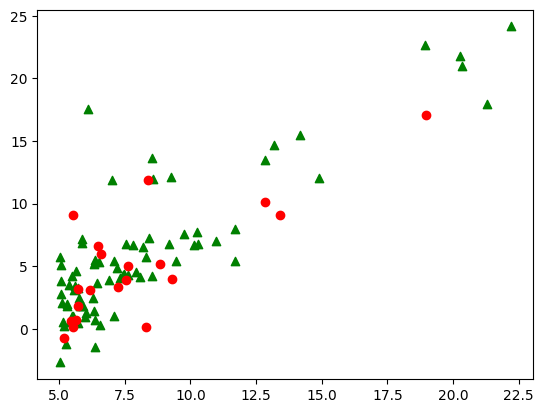

In [13]:
plot_data(X_train, X_test, y_train, y_test)

In [14]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

In [15]:
y = y_train[:]

In [16]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
34.574204347180526


In [17]:
alpha = 0.01
num_iters = 1500

In [18]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 6.054247893065688; Theta 1: 4.852048971758054


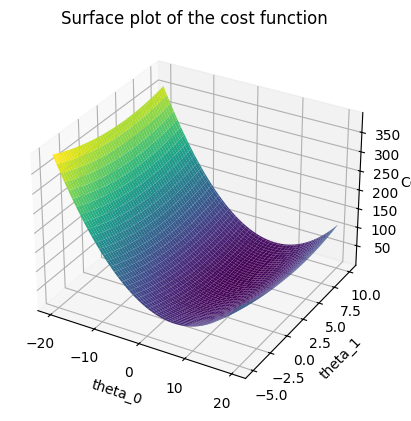

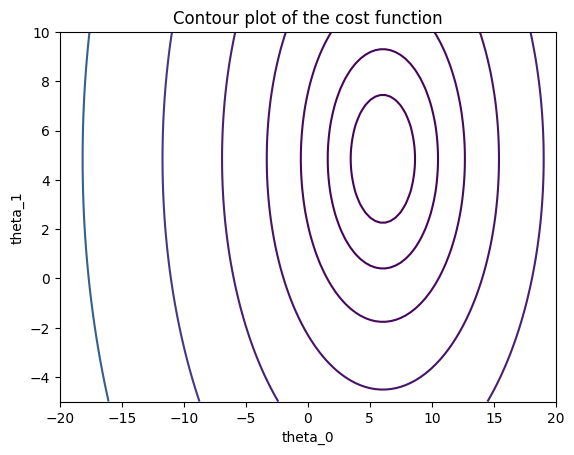

In [19]:
plot_J(X, y)

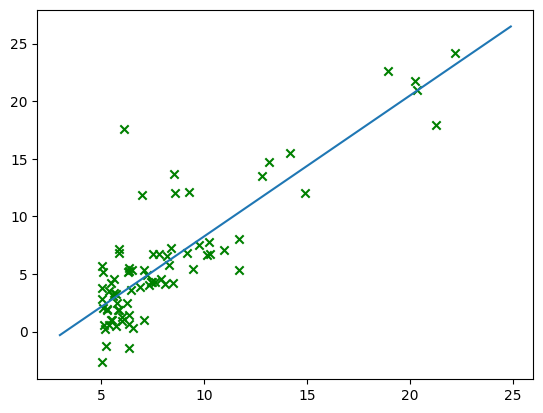

In [20]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X_train[:, 0], y_train, marker='x', c='green')

plt.show()

In [21]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = (X_test - mean)/std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test.flatten(), 'y_actual' : y_test.flatten(), 'y_pred' : y_test_pred.flatten(), 'err' : rel_diff})

print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred          err
0    6.4862   6.59870   3.961635    39.963403
1    5.1793  -0.74279   2.362477   418.054522
2    8.8254   5.16940   6.823942    32.006470
3    5.5277   9.13020   2.788789    69.455338
4   13.3940   9.05510  12.414203    37.096259
5    7.6031   4.99810   5.328304     6.606582
6   12.8360  10.11700  11.731420    15.957494
7    5.4369   0.61705   2.677683   333.949180
8    8.2934   0.14454   6.172973  4170.771450
9    8.3829  11.88600   6.282488    47.143802
10  18.9590  17.05400  19.223686    12.722446
11   9.3102   3.96240   7.417157    87.188489
12   5.5204   0.15200   2.779856  1728.852794
13   6.1891   3.13860   3.598095    14.640139
14   7.5386   3.88450   5.249380    35.136559
15   7.2259   3.34110   4.866752    45.663152
16   5.7340   3.15510   3.041223     3.609302
17   5.6407   0.71618   2.927059   308.704311
18   5.7077   1.84510   3.009042    63.082842
19   6.5894   5.99660   4.087913    31.829484
4.584582045345917
